# 機械学習アラカルト

### Q1. 勾配法（最急降下法）
下記コードを実行後に得られる``X``および``y``には，$y=3.14x-1.59$で表される直線上の点にノイズを加えたデータが納められている．このデータが$y=ax+b$という直線から得られたと仮定する．最急降下法を実装し，パラメータ``a``および``b``を求めよ．

なお，パラメータ更新ステップの学習率は$10^{-4}$とせよ．また，終了条件は以下とせよ．
* パラメータ更新回数が一定回数以上になった時，もしくは
* パラメータの更新量の絶対値が$10^{-8}$以下になった時

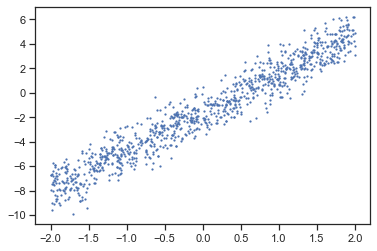

In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('ticks')
%matplotlib inline


def f(x):
    return  3.14 * x - 1.59

data_num = 1000
X = np.random.uniform(-2, 2, data_num).reshape(-1, 1)
y = f(X) + np.random.normal(0, 1, data_num).reshape(-1, 1)

sns.scatterplot(x=X[:, 0], y=y[:, 0], linewidth=0, s=5)
plt.show()

### Q2. 勾配法（確率的勾配降下法）
確率的勾配降下法を実装し，先の課題のパラメータ推定を行い，計算速度および精度を比較せよ．なお，パラメータ更新ステップの学習率や終了条件は先の課題と同じとする．

### Q3. 次元の呪い（1/2）（最近傍点と最遠傍点との距離の差）
各次元の定義域が[-1, 1]であるN次元のユークリッド空間$R^n$において，完全にランダムが点が散らばっている状況を考える．今，この空間上の点をランダムに50個取得した際，各点間のユークリッド距離の最大値と最小値の差を$\delta_{dist}$とする．なお，この空間では，点間のユークリッド距離が取り得る最大値は$2\sqrt{n}$となる．

このユークリッド空間$R^n$の次元数を1から5000まで変化させたとき，$2\sqrt{n}$で正規化した$\delta_{dist}$の値がどのように変化するか，X軸を次元数，Y軸を$\delta_{dist}$とする折れ線グラフで可視化せよ．また，高次元空間における点間の関係性を考察せよ．

* ヒント1：下記コードは，各次元の定義域が[-1,1]である5次元ユークリッド空間上の点を（行列として）ランダムに3つ生成するコードである．
* ヒント2：行列で表現された各ベクトル間の距離を計算には，``scipy``ライブラリの``spatial.distance.pdist``関数などが便利である．

### Q4. 次元の呪い（2/2）（コサイン距離の平均値）
先の課題Qにおいて定義したN次元のユークリッド空間$R^n$において，ランダムに取得した50個の点間の**コサイン距離**の平均値を$dist_{avg}$，標準偏差を$dist_{std}$とする．

このユークリッド空間$R^n$の次元数を1から5000まで変化させたとき，$dist_{avg}$および$dist_{std}$の値がどのように変化するか，折れ線グラフで可視化せよ．また，高次元空間における点間の関係性を考察せよ．

### Q5. 多項式回帰（1/2）
``data/blobs``ディレクトリの``poly.tsv``には，変数$x$と$y$間の関係がある条件に従う2次元データが格納されている．下図は当該データの散布図である．2次元データの変数$x$と$y$の関係が$x$に関するN次関数（$y=w_d  x^d + w_{d-1}  x^{d-1}+ ... + w_1  x + w_0 $）で表されると仮定し，そのパラメータ（$\{w_d, w_{d-1}, ..., w_0\}$）を推定したい．

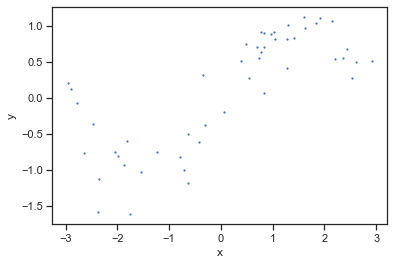

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('ticks')
%matplotlib inline

df = pd.read_table('../data/blobs/poly.tsv', sep='\t', header=0)
X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

fig = sns.scatterplot(x=X[:, 0], y=y[:, 0], linewidth=0, s=5)
fig.set_xlabel('x')
fig.set_ylabel('y')
plt.show()

2次元データの変数$x$と$y$の関係が$x$に関する3次関数（$y=w_3  x^3 + w_2  x^2 + w_1 x + w_0 $）で表されると仮定し，$x$から$y$を予測する回帰モデルを線形回帰によって構築せよ．また，5分割交差検証法によって，推定したモデルの平均絶対誤差（MAE）を求めよ．

なお，$x$のN次関数の線形回帰（多項式回帰）を行う前処理として，入力となるスカラーデータ$x$を$v_x=(x_1, x_2, ..., x_d)$のようなベクトルデータに拡張する必要がある．この処理は下記コードのように，``sklearn``の``PolynomialFeatures``クラスを用いることで行うことができる．

In [26]:
from sklearn.preprocessing import PolynomialFeatures as PF

X_sample = np.array([[1], [2], [3], [4]])

# xの3次多項式（3次関数用）に拡張
pf = PF(degree=3, include_bias=False)

X_sample_poly = pf.fit_transform(X_sample )
X_sample_poly

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

### Q6. 多項式回帰（2/2）：過学習
``data/blobs``ディレクトリの``poly.tsv``ファイルの2次元データについて，変数$x$と$y$の関係が$x$に関するN次関数で表されると仮定し，Nを1から30まで変化させて多項式回帰を行い，訓練データおよび評価データに対する平均絶対誤差を計算せよ．さらに，Nに対する平均絶対誤差の変化を訓練データ，評価データ別に折れ線グラフにプロットし，構築した回帰モデルの汎化性能について考察せよ．なお，性能評価には5分割交差検証法を用いよ．

### Q7. 正則化（Embedding methodによる特徴量選択）
単純な線形回帰は，m次元のデータ$x \in R^m$と$y$の関係が$y=f(x)= w_1 x_1 + w_2 x_2 + .... + w_m x_m$ で表現されると仮定したときに，データセット$D =\{(x^i, y^i) | i=1,...n\} $に対して下記誤差関数を最小化するようなパラメータ$w = (w_1, w_2, ..., w_m)$を推定する．

$$
L = \frac{1}{n} \sum_{x \in X} (y - f(x))^2
$$

単純な線形回帰は，データの次元数（説明変数の数）が増えると過学習を起こしやすいという問題がある．

過学習を防ぐ方法の1つとして，学習するパラメータの値に制約を設ける**正則化**と呼ばれる方法がある．[Lasso回帰](https://ja.wikipedia.org/wiki/ラッソ回帰)は，誤差関数を最小化する代わりに，下記関数$L'$を最小化することでパラメータ$w$を学習する．

$$
L' = \frac{1}{n} \sum_{x \in X} (y - f(x))^2 + \lambda \sum_{i}^m |w_i|
$$

上記関数の値を最小化する結果として，Lasso回帰は予測に不要とされるパラメータがゼロになるという性質がある．

``data/blobs``ディレクトリの``poly.tsv``ファイル中に格納された2次元データについて，変数$x$と$y$の関係は$x$の10次関数として表されると仮定する．この仮定の上で，課題Q5のデータにLasso回帰を行い，$x$から$y$を予測する回帰モデルを構築せよ．また，構築した予測モデルを5分割交差検証法で評価せよ．また，構築された予測モデルのパラメータを確認し，選択された特徴量（重みがゼロでない特徴量）を調べよ．

なお，評価指標は平均絶対誤差とせよ．Lasso回帰には``sklearn``の``Lasso``クラスを用いよ．

### Q8. SVM回帰
Q5-Q7で用いた2次元データについてSVM回帰を行い，変数$x$から$y$を予測する回帰モデルを構築せよ．また，構築した予測モデルを5分割交差検証法で評価せよ．また，評価値が最も小さかったモデルについて，その回帰曲線をグラフにプロットせよ．

なお，評価指標は平均絶対誤差とせよ．Lasso回帰には``sklearn``の``Lasso``クラスを用いよ．また，グラフのX軸の範囲は$[-3, 3]$とせよ．

### Q9. 特徴量選択再訪（1/2）

[Madelon Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/)には，ある規則によって人工的に生成されたデータである．当該データセットは2値分類問題用のデータセットであり，訓練用のデータセット（``madelon_train.xxx``）と評価用のデータセット（``madelon_valid.xxx``）が納められている．データセットは以下のファイルが含まれる．

* ``madelon_train.data``：500次元のデータが1500個納められたファイル（行が1データに対応．列はスペースで区切られている）
* ``madelon_train.labels``：``madelon_train.data``の各データに割り当てられたラベル（1もしくは-1）
* ``madelon_valid.data``：500次元のデータが500個納められたファイル（行が1データに対応．列はスペースで区切られている）
* ``madelon_valid.labels``：``madelon_valid.data``の各データに割り当てられたラベル（1もしくは-1）

Madelon Datasetの訓練データに対してRandom Forestを適用し，当該データに対するラベル分類器を構築せよ．また，構築した分類器と評価データを用いて，分類器の性能（F1値）を評価せよ．さらに，分類器に寄与した特徴量上位20件を求めよ．

### Q10. 特徴量選択再訪（2/2）
予測対象とは関係がない特徴量は，モデルの予測性能を低下させる可能性がある．そのため，前処理として特徴量選択が行われることがある．特徴量選択はモデルの予測性能の向上だけでなく，学習や予測にかかる時間の短縮や過学習対策に寄与する．

Q9で求めた重要度の高い特徴量上位20件のみを用いて，Madelon Datasetに対するラベル分類器を再度構築し，その分類性能（F1値）を求め，Q9の結果と比較せよ．